# MNIST Digit Classification with a Convolutional Neural Network (CNN)
*By Carlos Santiago Bañón*

**Year:** 2020

**Technologies:** Python, NumPy, Matplotlib, TensforFlow, Keras

**Discipline(s):** Computer Vision, Deep Learning

**Keywords:** `classification`, `cnn`, `computer-vision`, `convolution`, `convolutional-neural-network`, `deep-learning`, `fully-connected`, `max-pooling`, `mnist`, `multi-class-classification`, `neural-network`, `2d-convolution`, `2d-max-pooling`

This notebook presents an MNIST digit classifier built with a convolutional neural network (CNN) in TensorFlow and Keras.

## 1. Import Statements

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf

2023-11-07 19:08:16.344372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 19:08:16.435116: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-07 19:08:16.456471: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 19:08:16.834375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

## 2. Data Preprocessing

---



The first step is to preprocess our data. Here, we load the MNIST digit dataset from the Keras datasets library, split it into training and test sets, reshape the matrices, and encode the labels categorically.

In [2]:
# Load the MNIST dataset.
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

In [3]:
# Divide the data into features and labels.
train_images, train_labels = train_data

test_images, test_labels = test_data

In [4]:
p = 1
chance_del_number = np.random.choice(a=[False, True], size=60000, p=[p, 1-p])  
train_images = np.delete(train_images, np.where((train_labels == 8) & chance_del_number)[0], axis=0)
train_labels = np.delete(train_labels, np.where((train_labels == 8) & chance_del_number), axis=0)
print(type(train_images))
permutation = np.random.permutation(len(train_images))
train_images = train_images[permutation]
train_labels = train_labels[permutation]

<class 'numpy.ndarray'>


In [5]:
print(train_images.shape)
print(train_labels.shape)
print(np.unique(train_labels,return_counts=True))

(60000, 28, 28)
(60000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


# SET DATASET SIZE

In [6]:
DATASET_SIZE=60000
train_images = train_images[:DATASET_SIZE]
train_labels = train_labels[:DATASET_SIZE]

In [7]:
# Reshape and normalize the images.
X_train = train_images.reshape((DATASET_SIZE, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [8]:
# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

Further, the following are the shapes of each matrix, as well as a visualization of a random MNIST digit.

In [9]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 28, 28, 1)
Testing Images: (10000, 28, 28, 1)
Training Labels: (60000, 10)
Test Labels: (10000, 10)


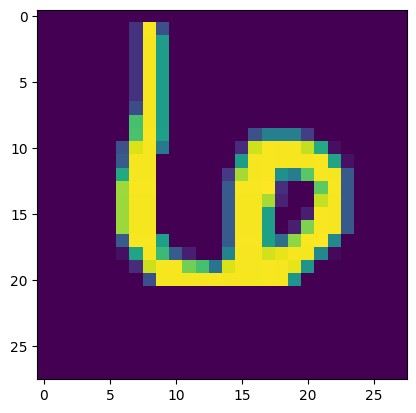

In [10]:
# Show a sample MNIST digit.
plt.imshow(train_images[10])
plt.show()

## 3. Convolutional Neural Network (CNN)

---



### 3.1. Define the Model

We then have to define our convolutional neural network.

In [11]:
# Define the sequential model.
model = tf.keras.models.Sequential()

2023-11-07 19:08:17.555340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-07 19:08:17.558563: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-07 19:08:17.558670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-07 19:08:17.559119: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

In [12]:
# Define the convolutional neural network.
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [13]:
# Show the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [14]:
# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 3.2. Train the Model

We then train the model on 10 epochs, using a batch size of 128.

In [15]:
# Define the parameters.
num_epochs = 10
batch_size = 128

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test, y_test))

Epoch 1/10


2023-11-07 19:08:18.873158: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-07 19:08:19.320900: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


 29/469 [>.............................] - ETA: 0s - loss: 1.4569 - accuracy: 0.6018   

2023-11-07 19:08:19.682872: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


469/469 [==============================] - 3s 2ms/step - loss: 0.2539 - accuracy: 0.9254 - val_loss: 0.0678 - val_accuracy: 0.9789
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0620 - accuracy: 0.9811 - val_loss: 0.0407 - val_accuracy: 0.9874
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0347 - val_accuracy: 0.9886
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0273 - val_accuracy: 0.9909
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.0366 - val_accuracy: 0.9879
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0306 - val_accuracy: 0.9905
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0271 - val_accuracy: 0.9911
Epoch 8/10
469/46

### 3.3. Display the Metrics

Finally, we display the metrics. We begin by displaying the model's accuracy and loss based on the test set.

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 0s 862us/step - loss: 0.0261 - accuracy: 0.9915
Test Accuracy: 0.9915000200271606
Test Loss: 0.026112450286746025


Then, we save the metric values for each epoch to plot the loss and accuracy curves for our model.

In [17]:
# Save the metrics.
metrics = history.history

Finally, once we have our metric history, we can plot the curves.

In [18]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

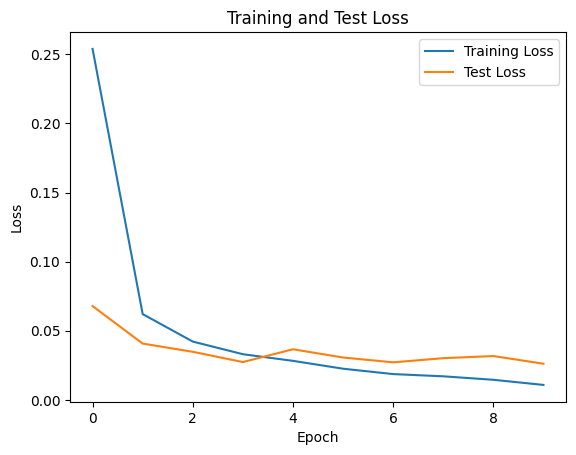

In [19]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [20]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

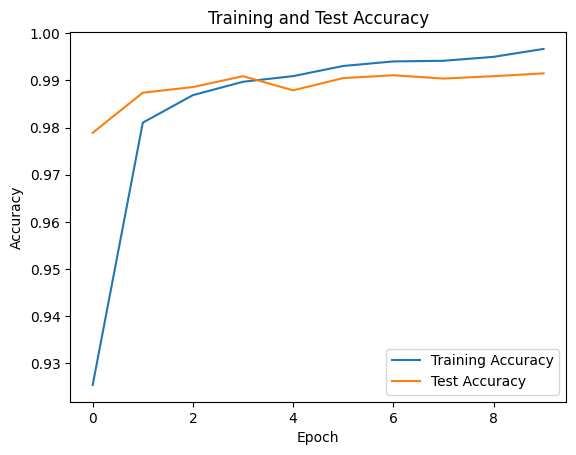

In [21]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

## 4. Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [22]:
# Make predictions with the trained model.
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 0s 614us/step


array([[4.1555903e-13, 3.8493599e-09, 5.0740079e-09, ..., 9.9999964e-01,
        2.7587377e-09, 1.4774636e-08],
       [9.2512593e-08, 7.0865468e-08, 9.9999988e-01, ..., 7.6520362e-10,
        1.5605441e-10, 1.4512131e-12],
       [4.8733337e-08, 9.9996388e-01, 1.4294145e-07, ..., 2.2693983e-05,
        2.1115164e-07, 9.4752380e-08],
       ...,
       [4.7031319e-16, 3.6645964e-10, 7.3330437e-13, ..., 1.1731159e-09,
        5.2270441e-09, 1.6223233e-09],
       [2.7760716e-09, 6.9392786e-12, 1.5907298e-11, ..., 3.6840278e-10,
        7.6971191e-06, 2.9049271e-10],
       [3.6882184e-09, 1.1463352e-13, 1.7936447e-09, ..., 3.0944184e-14,
        1.3780236e-09, 8.6292024e-12]], dtype=float32)

Finally, we can show a random test image with its corresponding prediction.

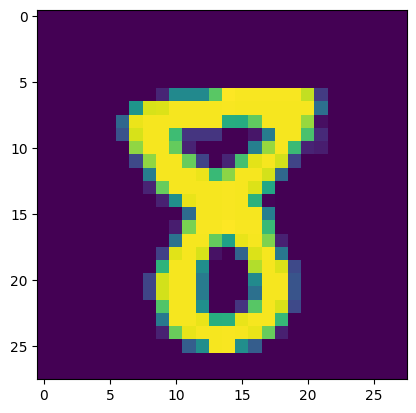

In [23]:
# Choose an index.
index = 128

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

In [24]:
print("Prediction:", np.argmax(predictions[index]))

Prediction: 8


In [25]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

top1_predictions=[np.argmax(preds) for preds in predictions]
correct_test_labels=[np.argmax(label) for label in y_test]
unique, counts = np.unique(correct_test_labels, return_counts=True)
#Create confusion matrix and normalizes it over predicted (columns)
#conf_matr = multilabel_confusion_matrix(y_test, top1_predictions)
conf_matrix=np.zeros((10,10),dtype=np.float64)
for i,y_i in enumerate(correct_test_labels):
    conf_matrix[y_i,top1_predictions[i]]+=1

for i in range(10):
    conf_matrix[i]=conf_matrix[i]/float(counts[i])*100

In [26]:
import pandas as pd
conf_matrix
df = pd.DataFrame(conf_matrix, columns = [i for i in range(10)], index=[i for i in range(10)])

def highlight_cells(s):
    index_max=s.idxmax()
    s2=s.to_numpy()
    #[0:index_max]+s[index_max+1:]
    #print(s)
    
    s2=(np.concatenate((s2[0:index_max],[-1],s2[index_max+1:])))
    #print(s2)
    second_index_max = s2.argmax()
    #print(second_index_max)
    color = 'grey'
    return ['background-color: %s' % "#FF3131"if i==index_max else 'background-color: %s' % "coral" if i==second_index_max else 'background-color: %s' % "#e5e8ec" for i in range(10)]
df=df.style.apply(highlight_cells,axis=1).format(precision=2)



ModuleNotFoundError: No module named 'pandas'

In [27]:
#display(df)

In [28]:
top1_predictions

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [29]:
type(y_test)
y_test.shape

(10000, 10)

In [52]:
def KL(P,Q):
     """ Epsilon is used here to avoid conditional code for
     checking that neither P nor Q is equal to 0. """
     epsilon = 0.00001

     # You may want to instead make copies to avoid changing the np arrays.
     P = P+epsilon
     Q = Q+epsilon

     divergence = np.sum(P*np.log(P/Q))
     return divergence

#READ GENERATED IMAGES
CODICE_RUN = "m256"
generated_images_path = f"/home/fogliodicarta/Desktop/vault/programmiTesi/GAN_target/{CODICE_RUN}whitebox/generated"
ds=tf.keras.utils.image_dataset_from_directory(generated_images_path,color_mode="grayscale",label_mode=None,batch_size=1,image_size=(28,28))
iteratorDS=ds.as_numpy_iterator()
arr=np.fromiter(iteratorDS,np.dtype("(28,28,1)f4"))
print(arr.shape)
#COMPUTE PREDICTIONS
generated_predictions = model.predict(arr)
#COMPUTE MARGINAL PROBS
marginal_probs = np.zeros(10)
for i in range(len(generated_predictions)):
    for digit in range(10):
        marginal_probs[digit]+=generated_predictions[i,digit]
normalization_coeff_marginal = marginal_probs.sum()
marginal_probs=marginal_probs/normalization_coeff_marginal
print(marginal_probs)

#ERRORE PROBABILMENTE E' DA NORMALIZZARE ROBA   '
KLbyClass = np.zeros(10)
for i in range(len(generated_predictions)):
    KLbyClass+=KL(marginal_probs,generated_predictions[i])

IS=np.exp(KLbyClass.mean())
f = open(f"IS{CODICE_RUN}.txt", "w")
f.write(f"{IS}")
f.close()
'''  
# Should be normalized though
values1 = np.asarray([1.346112,1.337432,1.246655])
values2 = np.asarray([1.033836,1.082015,1.117323])

# Note slight difference in the final result compared to Dawny33
print KL(values1, values2) # 0.775278939433'''


Found 20000 files belonging to 1 classes.
(20000, 28, 28, 1)
625/625 [==============================] - 0s 728us/step
[0.08773032 0.03787015 0.16651675 0.11646558 0.02647397 0.16842022
 0.0891962  0.05748237 0.11515171 0.13469273]


/tmp/ipykernel_631121/381259345.py:36: RuntimeWarning: overflow encountered in exp
  IS=np.exp(KLbyClass.mean())


'  \n# Should be normalized though\nvalues1 = np.asarray([1.346112,1.337432,1.246655])\nvalues2 = np.asarray([1.033836,1.082015,1.117323])\n\n# Note slight difference in the final result compared to Dawny33\nprint KL(values1, values2) # 0.775278939433'

In [51]:
KLbyClass


array([158416.47060401, 158416.47060401, 158416.47060401, 158416.47060401,
       158416.47060401, 158416.47060401, 158416.47060401, 158416.47060401,
       158416.47060401, 158416.47060401])

In [46]:
KLbyClass[1]

6825208023.448034

In [36]:
np.exp(KLbyClass)


/tmp/ipykernel_631121/1070726214.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(KLbyClass)


array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

In [43]:
generated_predictions[:,:].sum()

20000.0